In [2]:
import gsw
import utils
import xarray
import numpy
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")

In [3]:
# Computed at the bottom of this document in the figure
density_gradient = 3*10**(-5)
2000*density_gradient
WDWtemp = 0.9
MRDWtemp = 0.5
WDWsal = 34.89#851
MRDWsal = 34.851#89

In [4]:
# Compute the density difference due to the salinitsy difference
temperature = 0.7
dens_diff = gsw.density.sigma0(34.86,temperature)-gsw.density.sigma0(34.875,temperature)
print('density difference: %s'%dens_diff)
print('vertical displacement: %s'%(dens_diff/density_gradient))

density difference: -0.012007013968741376
vertical displacement: -400.2337989580458


In [5]:
# Compute the density difference due to the temperature difference
salinity = 34.87
dens_diff = gsw.density.sigma0(salinity, 0.6)-gsw.density.sigma0(salinity,1.2)
print('density difference: %s'%dens_diff)
print('vertical displacement: %s'%(dens_diff/density_gradient))

density difference: 0.039288555557277505
vertical displacement: 1309.6185185759166


In [6]:
# density difference due to thermobaric effect of 500m of vertical water displacement
dens_diff = (gsw.density.rho(34.87, 0.5, 200)-gsw.density.rho(34.87, 0.5, 700)) - ( 
             gsw.density.rho(34.87, 0.9, 200) - gsw.density.rho(34.87, 0.9, 700))

print('density difference: %s'%dens_diff)
print('vertical displacement: %s'%(dens_diff/density_gradient))

density difference: -0.005861040777745075
vertical displacement: -195.3680259248358


In [7]:
# density difference due to double-diffusive convection,
# assuming temperature equalizes while salinity is still different
# dens_diff = (gsw.density.rho(34.86, 0.75, 500)-gsw.density.rho(34.89, 0.75, 500))

# First: consider a water mass in (density-)equilibrium:
dens_diff0 = (gsw.density.rho(34.851, 0.5, 500)-gsw.density.rho(34.89, 0.9, 500))
dens_diff = (gsw.density.rho(34.851, 0.9, 500)-gsw.density.rho(34.89, 0.9, 500))

#- ( 
             #gsw.density.rho(34.87, 1, 0) - gsw.density.rho(34.87, 1, 500))
print('density difference: %s (equalized) leads to %s m'%(
    dens_diff0, dens_diff0/density_gradient))
print('density difference: %s'%dens_diff)
print('vertical displacement: %s'%(dens_diff/density_gradient))

# Density of a cold instrusion after it adjusted to WDW warmth:
double_dens = gsw.density.sigma0(MRDWsal, WDWtemp)
double_dens

density difference: -1.2340584589765058e-05 (equalized) leads to -0.4113528196588352 m
density difference: -0.031023968361296284
vertical displacement: -1034.132278709876


27.801408397390333

Returning previously computed DataFrame...


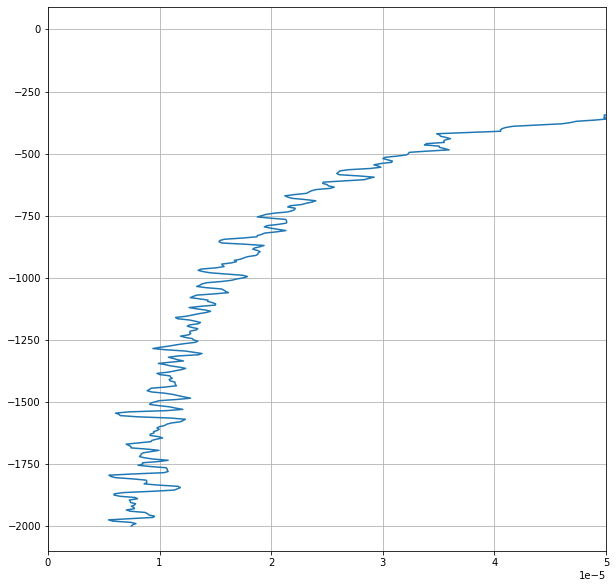

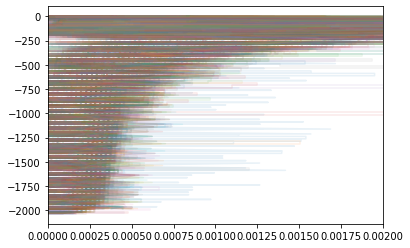

In [71]:
# try to plot the density gradients
plt.subplots(figsize=[10,10])
df, profiles = utils.create_dataframe(pfloat='300234067208900.nc', force_reconstruction=False)
df_col = xarray.open_dataset('../data/collocation_300234067208900.nc'); title='300234067208900'
xi, yi, grid_z0 = utils.create_datagrid(df=df, variable='den')
meanprofile = numpy.nanmean(grid_z0,axis=1,)
plt.plot(numpy.gradient(meanprofile,5),yi)
plt.xlim(0.0,0.00005)

plt.grid()
plt.show()
for profile in profiles:
    plt.plot(numpy.gradient(profile['den']), profile['pre'], alpha=0.1)
    #plt.xlim(27.75,27.85)
    plt.xlim(0.0,0.002)

Returning previously computed DataFrame...
-64.80962372632945 5.189261871570793 2017-09-25 00:00:00
-64.838 6.405 2017-11-06 00:00:00
-64.413 4.478 2018-02-27 00:00:00
-65.458 5.796 2018-04-20 00:00:00
-65.458 5.796 2018-04-20 00:00:00


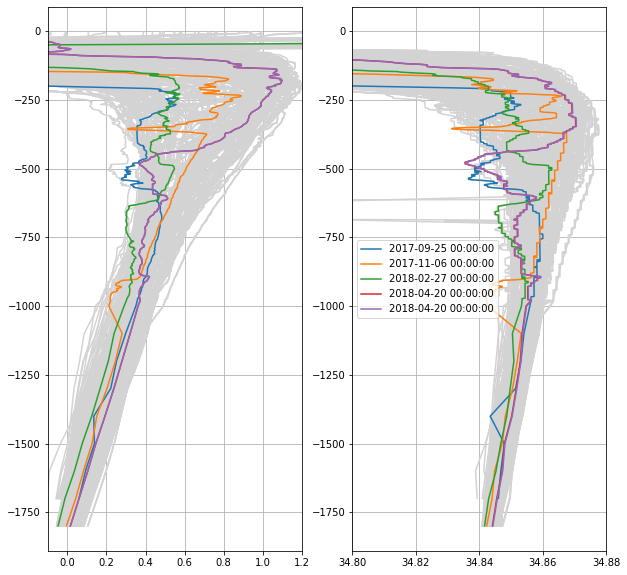

In [145]:
df, profiles = utils.create_dataframe(pfloat='5904471_Mprof.nc', force_reconstruction=False)
df_col = xarray.open_dataset('../data/collocation_5904471_Mprof.nc'); #title='300234067208900'
fig, axs = plt.subplots(figsize=[10,10], ncols=2)
start = 0
end   = 300
for i,profile in enumerate(profiles[start:end]):
    #plt.subplots(figsize=[10,10])
    #.title(profile['cyk'].iloc[0])
    axs[0].plot(profile['tem'], profile['pre'],color='lightgrey')
    axs[1].plot(profile['sal'], profile['pre'],color='lightgrey')

for cyk in [198, 206, 248, 266, 268]:
    profile = df[df['cyk']==cyk]
    print(profile['lat'].iloc[0],profile['lon'].iloc[0], profile['dates'].iloc[0])
    #plt.subplots(figsize=[10,10])
    #plt.title(profile['cyk'].iloc[0])
    axs[0].plot(profile['tem'], profile['pre'])#,color='k')
    axs[1].plot(profile['sal'], profile['pre'], label=profile['dates'].iloc[0])#,color='k')
    
axs[1].legend()
axs[0].set_xlim(-0.1,1.2)
axs[0].grid()
axs[1].set_xlim(34.8,34.88)
axs[1].grid()
# cool: 198, 206, 248, 266, 268

In [131]:
df[df['cyk']==100]

,sal,tem,pre,tim,timestamps,den,lat,lon,nsq,cyk,dates,oxy
24747,34.478117,-1.565617,-3.320000,2016-05-19,1.463609e+09,27.620793,-64.919,2.865,-3.656687e-07,100,2016-05-19,--
24748,34.478041,-1.565649,-4.920000,2016-05-19,1.463609e+09,27.620732,-64.919,2.865,-3.656399e-07,100,2016-05-19,--
24749,34.477945,-1.565688,-6.920000,2016-05-19,1.463609e+09,27.620656,-64.919,2.865,-3.231660e-07,100,2016-05-19,--
24750,34.477856,-1.565730,-9.020000,2016-05-19,1.463609e+09,27.620585,-64.919,2.865,-1.302237e-07,100,2016-05-19,--
24751,34.477855,-1.564775,-11.220000,2016-05-19,1.463609e+09,27.620555,-64.919,2.865,3.759104e-07,100,2016-05-19,--
...,...,...,...,...,...,...,...,...,...,...,...,...
25237,34.847878,0.123887,-1300.469971,2016-05-19,1.463609e+09,27.845715,-64.919,2.865,2.507983e-07,100,2016-05-19,--
25238,34.846704,0.086678,-1400.260010,2016-05-19,1.463609e+09,27.846816,-64.919,2.865,2.461519e-07,100,2016-05-19,--
25239,34.845618,0.051747,-1499.579956,2016-05-19,1.463609e+09,27.847845,-64.919,2.865,2.330522e-07,100,2016-05-19,--
25240,34.844226,0.016586,-1599.089966,2016-05-19,1.463609e+09,27.848625,-64.919,2.865,2.669116e-07,100,2016-05-19,--
